Starting a wildfire mapping project
Initial data sources: https://github.com/mbjoseph/mtbs-data
https://www.mtbs.gov/project-overview
https://www.mtbs.gov/articles/announcement/data-release-may-1-2017
https://www.mtbs.gov/viewer/index.html
https://www.mtbs.gov/direct-download
https://www.geomac.gov/
http://www.ospo.noaa.gov/Products/land/hms.html
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data
https://tinyletter.com/data-is-plural/letters/data-is-plural-2016-07-20-edition

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile

In [30]:
data_path = '../data/'
fire_occurrence = data_path + 'mtbs_fod_pts_data/mtbs_fod_pts_20170501.dbf'
fire_area = data_path + 'mtbs_perimeter_data/mtbs_perims_1984-2015_DD_20170815.dbf'

title= "wildfires"

wildfires


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-200, right=-200
  'left=%s, right=%s') % (left, right))


finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found points
creating polygon
Polygon created
finding points
found poi

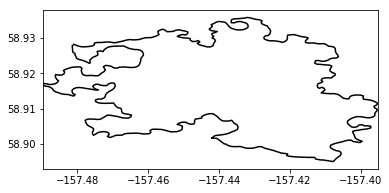

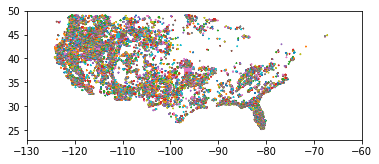

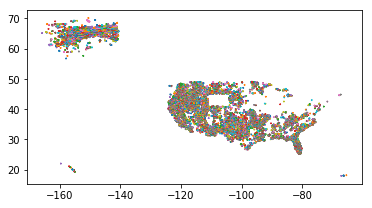

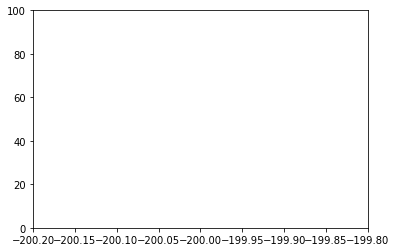

In [47]:
# sf = shapefile.Reader('AP/ap_abl.dbf')
sf = shapefile.Reader(fire_area)

print(title)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([-200,-200])
plt.ylim([0,100])

for shape in sf.shapes():
    print('finding points')
    points = shape.points
    print('found points')
    
    print('creating polygon')
    ap = plt.Polygon(points, fill=False, edgecolor="k")
    ax.add_patch(ap)
    print("Polygon created")
    
print("Displaying polygons")
plt.show()

In [45]:
"""
basic_read_plot.py
reads a shapefile using the shapefile library, loops over imported shapes 
and plots the points defining each shape. 
Plotting is configured for use with state boundary shapefile from census.gov: 
  https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html
Copyright (C) 2016  Chris Havlin, <https://chrishavlin.wordpress.com>
    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""
import shapefile
import numpy as np
import matplotlib.pyplot as plt

"""
 IMPORT THE SHAPEFILE 
"""

sf = shapefile.Reader('mtbs_perims_1984-2015_DD_20170815.dbf')

print ('number of shapes imported:', len(sf.shapes()) )
print (' ')
print ('geometry attributes in each shape:')
for name in dir(sf.shape()):
    if not name.startswith('__'):
       print(name)

"""
       PLOTTING
"""

""" PLOTS A SINGLE SHAPE """
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
shape_ex = sf.shape(5)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

plt.plot(x_lon,y_lat,'k') 

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

""" PLOTS ALL SHAPES """
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
    x_lon = np.zeros((len(shape.points),1))
    y_lat = np.zeros((len(shape.points),1))
    for ip in range(len(shape.points)):
        x_lon[ip] = shape.points[ip][0]
        y_lat[ip] = shape.points[ip][1]
    
    plt.plot(x_lon,y_lat) 
plt.xlim(-130,-60)
plt.ylim(23,50)


""" PLOTS ALL SHAPES AND PARTS """
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat) 

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
               i1 = shape.parts[ip+1]-1
            else:
               i1 = npoints
            
            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]
            
            plt.plot(x_lon,y_lat) 

plt.xlim(-130,-60)
plt.ylim(23,50)
plt.show()

number of shapes imported: 20340
 
geometry attributes in each shape:
bbox
parts
points
shapeType


KeyboardInterrupt: 

In [46]:
print('yo')

yo


In [ ]:
print('whaddup')